## Data Preprocessing

In [26]:
import pandas as pd
import os
import re
from pathlib import Path

Import subject information

In [27]:
subjects = pd.read_csv("./data_subjects_info.csv")
subjects

,code,weight,height,age,gender
0,1,102,188,46,1
1,2,72,180,28,1
2,3,48,161,28,0
3,4,90,176,31,1
4,5,48,164,23,0
5,6,76,180,28,1
6,7,62,175,30,0
7,8,52,161,24,0
8,9,93,190,32,1
9,10,72,164,31,0


Rename files

In [28]:
"""
def rm(old_file_path, new_file_name):
    dir_path = os.path.dirname(old_file_path)
    new_file_path = os.path.join(dir_path, new_file_name)
    os.rename(old_file_path, new_file_path)

folders = os.listdir(r'A_DeviceMotion_data/')

for folder in folders:
    folder_name = folder.split('_')

    if(int(folder_name[1])<= 9):
        old_folder_path = './A_DeviceMotion_data/' + folder
        new_folder_name = folder_name[0] + "_0" + folder_name[1]
        folder = new_folder_name
        
        rm(old_folder_path, new_folder_name)

    files = os.listdir(r'./A_DeviceMotion_data/' + folder)

    for file in files:
        file_name = re.split('_|\\.', file)
        if(int(file_name[1])<= 9):
            old_file_path = './A_DeviceMotion_data/' + folder + '/' + file
            new_file_name = 'sub_0' + file_name[1] + '.csv'

            rm(old_file_path, new_file_name)
"""

'\ndef rm(old_file_path, new_file_name):\n    dir_path = os.path.dirname(old_file_path)\n    new_file_path = os.path.join(dir_path, new_file_name)\n    os.rename(old_file_path, new_file_path)\n\nfolders = os.listdir(r\'A_DeviceMotion_data/\')\n\nfor folder in folders:\n    folder_name = folder.split(\'_\')\n\n    if(int(folder_name[1])<= 9):\n        old_folder_path = \'./A_DeviceMotion_data/\' + folder\n        new_folder_name = folder_name[0] + "_0" + folder_name[1]\n        folder = new_folder_name\n        \n        rm(old_folder_path, new_folder_name)\n\n    files = os.listdir(r\'./A_DeviceMotion_data/\' + folder)\n\n    for file in files:\n        file_name = re.split(\'_|\\.\', file)\n        if(int(file_name[1])<= 9):\n            old_file_path = \'./A_DeviceMotion_data/\' + folder + \'/\' + file\n            new_file_name = \'sub_0\' + file_name[1] + \'.csv\'\n\n            rm(old_file_path, new_file_name)\n'

Combines all CSVs with labeled columns for easier analysis.

In [29]:
dfs = list()

folders = os.listdir(r'A_DeviceMotion_data/')
for folder in folders:
    path = r'A_DeviceMotion_data/' + folder
    files = Path(path).glob('*.csv')
    for file in files:
        data = pd.read_csv(file)
        data['subject_code'] = int(file.stem.split('_')[1])
        data['motion_type'] = folder.split('_')[0]
        data['trial_type'] = "long" if int(folder.split('_')[1]) <= 9 else "short"
        data['file_path'] = folder + "/" + file.stem
        dfs.append(data)

df = pd.concat(dfs, ignore_index=True)

df.rename(columns = {'Unnamed: 0':'Reading Number'}, inplace = True)
df

,Reading Number,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,subject_code,motion_type,trial_type,file_path
0,0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,1,dws,long,dws_01/sub_01
1,1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,1,dws,long,dws_01/sub_01
2,2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,1,dws,long,dws_01/sub_01
3,3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,1,dws,long,dws_01/sub_01
4,4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,1,dws,long,dws_01/sub_01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412860,2055,-1.287175,-1.180782,1.184133,-0.365012,0.924904,-0.106393,1.446270,2.409207,-1.052698,0.034354,-0.574501,0.060144,24,wlk,short,wlk_15/sub_24
1412861,2056,-1.217304,-1.160821,1.208497,-0.373942,0.917131,-0.137981,0.602010,2.675064,-0.472482,0.547953,-0.481645,-0.232273,24,wlk,short,wlk_15/sub_24
1412862,2057,-1.083201,-1.167077,1.269294,-0.347061,0.919606,-0.184047,1.125564,4.413143,1.581002,0.910034,0.194606,-0.770222,24,wlk,short,wlk_15/sub_24
1412863,2058,-0.966096,-1.193223,1.348783,-0.303291,0.929562,-0.209592,0.086910,0.436147,1.762577,0.811333,0.424518,-0.716784,24,wlk,short,wlk_15/sub_24


## Import libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sci

## Explore Data

In [31]:
df

,Reading Number,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,subject_code,motion_type,trial_type,file_path
0,0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,1,dws,long,dws_01/sub_01
1,1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,1,dws,long,dws_01/sub_01
2,2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,1,dws,long,dws_01/sub_01
3,3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,1,dws,long,dws_01/sub_01
4,4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,1,dws,long,dws_01/sub_01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412860,2055,-1.287175,-1.180782,1.184133,-0.365012,0.924904,-0.106393,1.446270,2.409207,-1.052698,0.034354,-0.574501,0.060144,24,wlk,short,wlk_15/sub_24
1412861,2056,-1.217304,-1.160821,1.208497,-0.373942,0.917131,-0.137981,0.602010,2.675064,-0.472482,0.547953,-0.481645,-0.232273,24,wlk,short,wlk_15/sub_24
1412862,2057,-1.083201,-1.167077,1.269294,-0.347061,0.919606,-0.184047,1.125564,4.413143,1.581002,0.910034,0.194606,-0.770222,24,wlk,short,wlk_15/sub_24
1412863,2058,-0.966096,-1.193223,1.348783,-0.303291,0.929562,-0.209592,0.086910,0.436147,1.762577,0.811333,0.424518,-0.716784,24,wlk,short,wlk_15/sub_24


In [32]:
print('Rows: '+ str(len(df)) +'\nCols: '+ str(len(df.columns)))
print(df.columns)

Rows: 1412865
Cols: 17
Index(['Reading Number', 'attitude.roll', 'attitude.pitch', 'attitude.yaw',
       'gravity.x', 'gravity.y', 'gravity.z', 'rotationRate.x',
       'rotationRate.y', 'rotationRate.z', 'userAcceleration.x',
       'userAcceleration.y', 'userAcceleration.z', 'subject_code',
       'motion_type', 'trial_type', 'file_path'],
      dtype='object')


In [33]:
print(df.dtypes)

Reading Number          int64
attitude.roll         float64
attitude.pitch        float64
attitude.yaw          float64
gravity.x             float64
gravity.y             float64
gravity.z             float64
rotationRate.x        float64
rotationRate.y        float64
rotationRate.z        float64
userAcceleration.x    float64
userAcceleration.y    float64
userAcceleration.z    float64
subject_code            int64
motion_type            object
trial_type             object
file_path              object
dtype: object


In [34]:
print(df.count())

Reading Number        1412865
attitude.roll         1412865
attitude.pitch        1412865
attitude.yaw          1412865
gravity.x             1412865
gravity.y             1412865
gravity.z             1412865
rotationRate.x        1412865
rotationRate.y        1412865
rotationRate.z        1412865
userAcceleration.x    1412865
userAcceleration.y    1412865
userAcceleration.z    1412865
subject_code          1412865
motion_type           1412865
trial_type            1412865
file_path             1412865
dtype: int64


## Organizing Data

In [35]:
# deep copy for now so any potential changes dont affect other pushes
df3 = df.copy(deep=True)
metrics = ['attitude.roll', 'attitude.pitch', 'attitude.yaw',
           'rotationRate.x', 'rotationRate.y', 'rotationRate.z',
           'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']

# getting the rotation data for each motion_type
grouped = df3.groupby(by=['motion_type', 'subject_code'])

metric_series = {}
obs_counts = {}
motion_avgs = {}

# the idea is that the mean value of each metric for each (motion_type, subject) pair 
# is more or less a accurate summary of of that pair's associated observations

# since they are from the same individual, it makes sense to weigh each observation equally
for m in metrics:
    metric_series[m] = grouped[m].mean()
    obs_counts[m] = grouped[m].count()

# df where indices are unique (motion_type, subject_code)
motion_subject_df = pd.DataFrame(data=metric_series, columns=metrics)
motion_subject_count_df = pd.DataFrame(data=obs_counts, columns=metrics)

# made 'motion_type' a dictionary key for easy search
motion_types = {'dws','jog','sit','std','ups', 'wlk'}
for t in motion_types:
    motion_avgs[t] = motion_subject_df.loc[t]

motion_subject_count_df.head(5)

attitude.roll  attitude.pitch  attitude.yaw  \
motion_type subject_code                                                
dws         1                      5105            5105          5105   
            2                      5878            5878          5878   
            3                      6324            6324          6324   
            4                      5086            5086          5086   
            5                      5049            5049          5049   

                          rotationRate.x  rotationRate.y  rotationRate.z  \
motion_type subject_code                                                   
dws         1                       5105            5105            5105   
            2                       5878            5878            5878   
            3                       6324            6324            6324   
            4                       5086            5086            5086   
            5                       5049            5049            5049   

                          userAcceleration.x  userAcceleration.y  \
motion_type subject_code                                           
dws         1                           5105                5105   
            2                           5878                5878   
            3                           6324                6324   
            4                           5086                5086   
            5                           5049                5049   

                          userAcceleration.z  
motion_type subject_code                      
dws         1                           5105  
            2                           5878  
            3                           6324  
            4                           5086  
            5                           5049

## Visualization

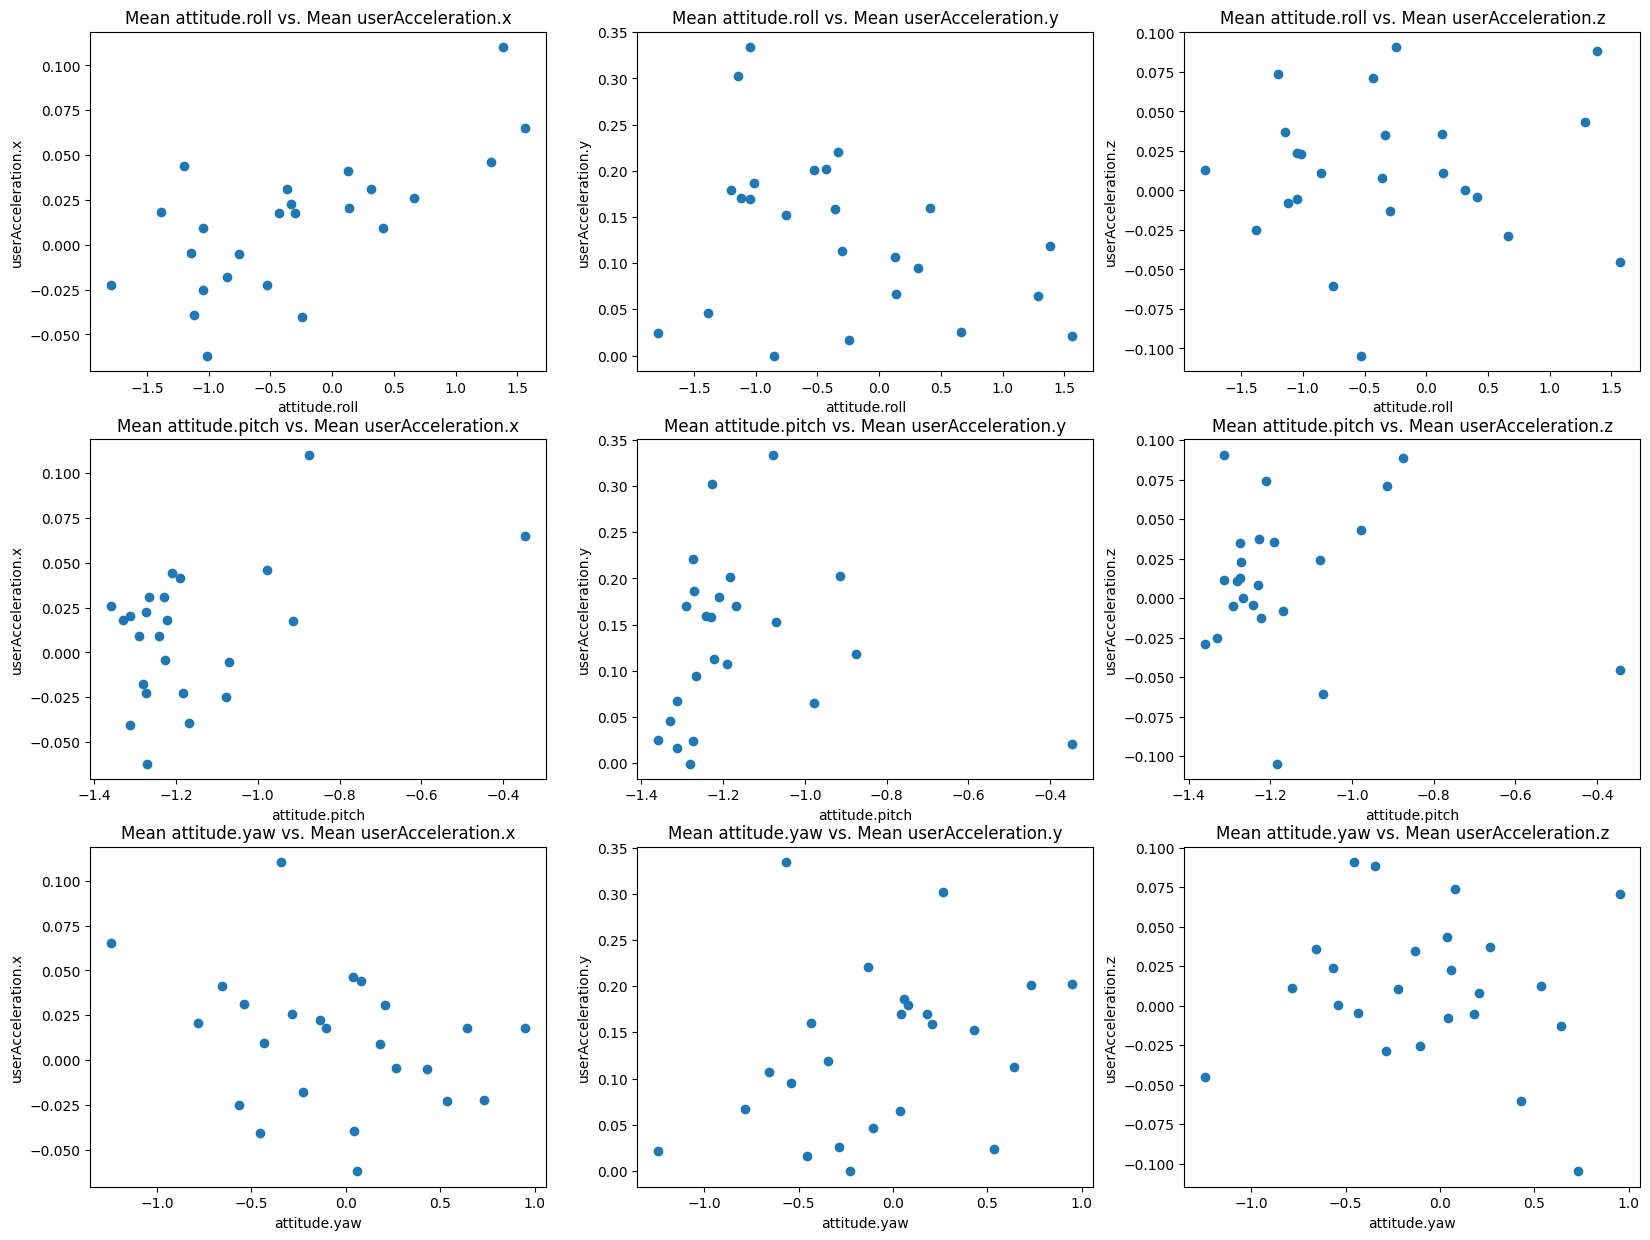

In [36]:
attitudes = ['attitude.roll', 'attitude.pitch', 'attitude.yaw']
accelerations = ['userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']

jog_df = motion_avgs['jog']

figure, axis = plt.subplots(3, 3, figsize=(20, 15))

x=0
for attitude in attitudes:
    y = 0
    for acceleration in accelerations:
        axis[x,y].scatter(jog_df[attitude],jog_df[acceleration])
        axis[x,y].set_title('Mean ' + attitude + ' vs. Mean '+ acceleration)
        axis[x,y].set_xlabel(attitude)
        axis[x,y].set_ylabel(acceleration)
        y+=1
    x+=1
plt.show()

attitude.pitch seems to be positively correlated to userAcceleration.x with a medium to strong correlation. attitude.yaw seems to be correlated positively with userAcceleration.y and negatively with userAccleration.x with a weak correlation for both. attitude.roll seems to have a medium to strong positive correlationi with userAcceleration.x

## Hypothesis Testing

Alpha: 0.05

Null Hypothesis: There is no correlation among the attitudes and accelerations during jogging.

Alternative Hypothesis: There is some correlation among the attitudes and accelerations during jogging.

In [37]:
for attitude in attitudes:
    for acceleration in accelerations:
        r, p_value = sci.pearsonr(jog_df[attitude],jog_df[acceleration])
        print('Correlation of '+attitude+' and '+acceleration+': '+str(r))
        print('P-value: '+str(p_value))

Correlation of attitude.roll and userAcceleration.x: 0.6875375592964951
P-value: 0.00020543660231509014
Correlation of attitude.roll and userAcceleration.y: -0.34281931189241366
P-value: 0.10101708717741253
Correlation of attitude.roll and userAcceleration.z: 0.05645619590757173
P-value: 0.7933046742999708
Correlation of attitude.pitch and userAcceleration.x: 0.47170614257090376
P-value: 0.019961936222275753
Correlation of attitude.pitch and userAcceleration.y: -0.031758210350871424
P-value: 0.8828842239167116
Correlation of attitude.pitch and userAcceleration.z: -0.03204640762395663
P-value: 0.8818286577647567
Correlation of attitude.yaw and userAcceleration.x: -0.30148654960045085
P-value: 0.15223153315673424
Correlation of attitude.yaw and userAcceleration.y: 0.3105904244731853
P-value: 0.13963107673595038
Correlation of attitude.yaw and userAcceleration.z: -0.09881399571507266
P-value: 0.6459667406025007


As the p-value for the correlation of attitude.roll and userAcceleration.x is less than the alpha value (0.0002<0.05) and the p-value for the correlation of attitude.pitch and userAcceleration.x is less than the alpha value (0.0199<0.05), we can reject the null hypothesis for these two correlations and assume that the attitudes of roll and pitch have an effect on the user's acceleration in the x direction. For the rest of the correlations, the p-value is greater than the alpha value, so we fail to reject the null hypothesis for them, suggesting that there is likely no correlation among those attitudes and user accelerations.